In [14]:
from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.utils import shuffle

In [15]:
def getKaggleMNIST():
    # column 0 is labels
    # column 1-785 is data with values 0..255
    # total size of csv: (42000, 1, 28, 28)
    train = pd.read_csv("./data/mnist.csv").values.astype(np.float32)
    train = shuffle(train)

    Xtrain = train[:-1000, 1:]/255
    Ytrain = train[:-1000, 0].astype(np.int32)

    Xtest = train[-1000:, 1:]/255
    Ytest = train[:-1000, 0].astype(np.int32)

    return Xtrain, Ytrain, Xtest, Ytest

In [16]:
Xtrain, Ytrain, Xtest, Ytest = getKaggleMNIST()

# decompose covariance
covX = np.cov(Xtrain.T) 

# eigenvalues lambda, eigenvectors Q, will eig vals will be sorted from smallest to largest
lambdas, Q = np.linalg.eigh(covX)

lambdas, Q

(array([-3.03118215e-16, -3.02149263e-16, -1.64778478e-16, -1.49578545e-16,
        -1.12475372e-16, -6.06186085e-17, -5.86430904e-17, -4.71381158e-17,
        -4.19899725e-17, -3.68333686e-17, -1.96893664e-17, -1.67358665e-17,
        -1.63530680e-17, -1.36110084e-17, -1.22628444e-17, -1.02056500e-17,
        -9.06038532e-18, -7.84875806e-18, -3.34560328e-18, -2.87972989e-18,
        -2.87547132e-18, -2.09968575e-18, -1.22177240e-18, -8.65774831e-19,
        -7.78575083e-19, -4.80827128e-19, -3.48680708e-19, -2.58010775e-19,
        -6.54777722e-20, -3.56070966e-20, -2.20193376e-20, -1.90324927e-20,
        -1.88301935e-20, -2.50055095e-21, -8.37406781e-22, -1.63566785e-22,
        -1.44050919e-32, -4.60794048e-33, -2.20862365e-33, -2.81270332e-34,
        -1.54075488e-34, -1.15489779e-34, -7.94792483e-35, -4.63259777e-35,
        -5.56046790e-36,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.0

In [17]:
idx = np.argsort(-lambdas) 
# sort in proper order
lambdas = lambdas[idx] 

# get rid of negatives, because variances cannot be negative (precission error)
lambdas = np.maximum(lambdas, 0) 
Q = Q[:, idx] 
lambdas

array([5.32112525e+00, 3.99466978e+00, 3.25981803e+00, 2.88245239e+00,
       2.66126528e+00, 2.23092115e+00, 1.74560006e+00, 1.55722348e+00,
       1.44698834e+00, 1.21001393e+00, 1.12464462e+00, 1.10080587e+00,
       9.18131174e-01, 8.87572346e-01, 8.31012051e-01, 7.86138853e-01,
       6.87472431e-01, 6.74536999e-01, 6.23803141e-01, 6.06635863e-01,
       5.62847982e-01, 5.40855577e-01, 5.13894267e-01, 4.78181812e-01,
       4.69329010e-01, 4.33031678e-01, 4.22753948e-01, 4.03830034e-01,
       3.82215365e-01, 3.64520803e-01, 3.46217696e-01, 3.32916129e-01,
       3.11768335e-01, 3.07345152e-01, 2.86972109e-01, 2.86419587e-01,
       2.68368735e-01, 2.54518125e-01, 2.42785058e-01, 2.38744914e-01,
       2.31794415e-01, 2.23493204e-01, 2.17665433e-01, 2.05609112e-01,
       1.97759443e-01, 1.95205019e-01, 1.89951239e-01, 1.74579762e-01,
       1.73027437e-01, 1.63839197e-01, 1.61266206e-01, 1.56950735e-01,
       1.50935490e-01, 1.47412547e-01, 1.43377964e-01, 1.39192023e-01,
      

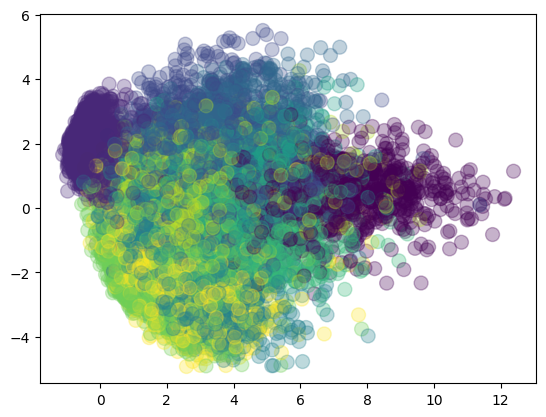

In [18]:
# plot the first 2 columns of Z
Z = Xtrain.dot(Q) 
plt.scatter(Z[:, 0], Z[:,1], s=100, c=Ytrain, alpha=0.3) 
plt.show()

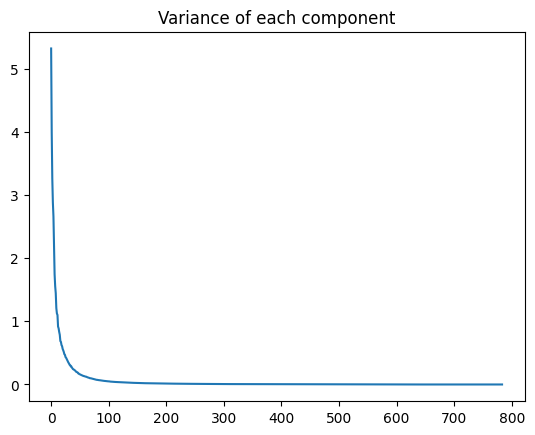

In [19]:
# plot variances 
plt.plot(lambdas) 
plt.title("Variance of each component")
plt.show() 

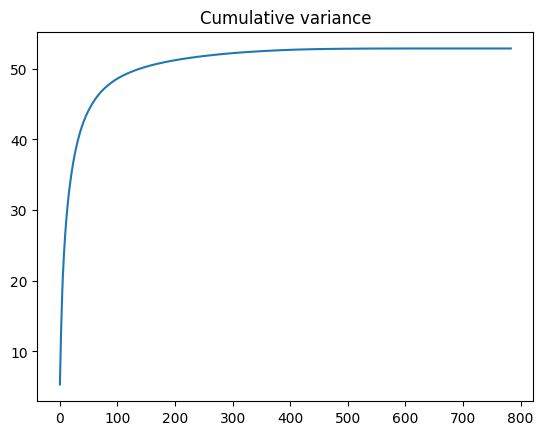

In [20]:
# cumulative variance 
plt.plot(np.cumsum(lambdas))
plt.title("Cumulative variance")
plt.show()